# Atividade 01: Análise de Dados com Pandas e NumPy

Aluno: Marcel Pontes  
Engenharia e Análise de Dados  
CESAR School  
26/04/2025

## Importando o dataset

In [3]:
from kagglehub import dataset_download

In [4]:
path = dataset_download("arpitsinghaiml/youtube-user-by-country-2025")
#df = load_dataset(KaggleDatasetAdapter.PANDAS, "arpitsinghaiml/youtube-user-by-country-2025", file_path)
print("Path to dataset files:", path)

Path to dataset files: /Users/mfnp/.cache/kagglehub/datasets/arpitsinghaiml/youtube-user-by-country-2025/versions/1


In [5]:
import pandas as pd
df = pd.read_csv(path + '/youtube-users-by-country-2025.csv')

## Descriçao do dataset

O dataset estudado reune estatísticas de usuário e de índices de penetração do YouTube em diferentes países para o ano de 2024, incluindo valores de comparação com o ano antecessor.  
  
Os registros são organizados de forma que cada entrada corresponde as dados de um país enquanto as colunas dão o nome de cada um, a quantidade de usuários total e relativa à população de cada país nos anos de 2024 e 2023.

In [6]:
df.head()

,flagCode,country,YouTubeUsers_TotalUsers_Num_2024Feb,YouTubeUsers_Penetration_Pct_2024Feb,YouTubeUsersJuly2023,YouTubeUsersPenetrationJuly2023
0,IN,India,462000000,61.5,467.0,36.2
1,US,United States,239000000,72.2,246.0,78.3
2,BR,Brazil,144000000,76.6,142.0,72.9
3,ID,Indonesia,139000000,75.0,139.0,55.0
4,MX,Mexico,83100000,77.5,81.8,71.1


In [7]:
df.describe()

,YouTubeUsers_TotalUsers_Num_2024Feb,YouTubeUsers_Penetration_Pct_2024Feb,YouTubeUsersJuly2023,YouTubeUsersPenetrationJuly2023
count,8.700000e+01,87.000000,87.000000,87.000000
mean,2.821110e+07,75.111494,29.044023,74.678161
std,5.906624e+07,14.553809,59.831989,18.881481
min,2.760000e+05,24.500000,0.290000,23.200000
25%,4.330000e+06,70.600000,4.405000,66.600000
50%,7.430000e+06,79.200000,7.640000,77.400000
75%,2.840000e+07,83.400000,31.150000,88.450000
max,4.620000e+08,98.200000,467.000000,112.300000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   flagCode                              87 non-null     object 
 1   country                               87 non-null     object 
 2   YouTubeUsers_TotalUsers_Num_2024Feb   87 non-null     int64  
 3   YouTubeUsers_Penetration_Pct_2024Feb  87 non-null     float64
 4   YouTubeUsersJuly2023                  87 non-null     float64
 5   YouTubeUsersPenetrationJuly2023       87 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.2+ KB


### Primeiros insights derivados do dataset

1. Observando a grande disparidade entre os dados das colunas de total de usuários do Youtube por país em 2024 e 2023 e, ao mesmo tempo, a semelhança em alguns dígitos, é possível inferir que as escalas das duas colunas estão diferentes. Enquanto a coluna de 2024 dá o total de usuários em unidades de pessoas, a de 2023 informa em milhões de pessoas.  
Com isso, para fazer operações que visem comparar a evolução em um ano, seria importante colocar ambas colunas na mesma escala.  
  
2. Um dado curioso, é que o valor percentual máximo de usuários do Youtube em 2023 é de 112.3%, o que dificilmente faria sentido, já que o número de usuários não deve ser superior ao total de habitantes, que deve ser usado como base para essa conta.  

3. Observando que a contagem de valores não nulos de cada coluna corresponde ao total de linhas, não há valores não preenchidos no dataset estudado.

## Criar a coluna categórica "Continent"

In [9]:
import pycountry_convert as pc

def country_code_to_continent(row):
    country_code = row['flagCode']
    try:
        #country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return "Country code not found"

In [10]:
df['continent'] = df.apply(country_code_to_continent, axis=1)
print(df['continent'])

0              Asia
1     North America
2     South America
3              Asia
4     North America
          ...      
82           Europe
83           Europe
84             Asia
85           Europe
86           Europe
Name: continent, Length: 87, dtype: object


### Reordenando as colunas

In [11]:
column_list = df.columns.to_list()
column_list.remove('continent')
column_list.insert(2, 'continent')
print(column_list)

['flagCode', 'country', 'continent', 'YouTubeUsers_TotalUsers_Num_2024Feb', 'YouTubeUsers_Penetration_Pct_2024Feb', 'YouTubeUsersJuly2023', 'YouTubeUsersPenetrationJuly2023']


In [12]:
df = df[column_list]
df.head()

,flagCode,country,continent,YouTubeUsers_TotalUsers_Num_2024Feb,YouTubeUsers_Penetration_Pct_2024Feb,YouTubeUsersJuly2023,YouTubeUsersPenetrationJuly2023
0,IN,India,Asia,462000000,61.5,467.0,36.2
1,US,United States,North America,239000000,72.2,246.0,78.3
2,BR,Brazil,South America,144000000,76.6,142.0,72.9
3,ID,Indonesia,Asia,139000000,75.0,139.0,55.0
4,MX,Mexico,North America,83100000,77.5,81.8,71.1


In [13]:
print('Numero de países em cada continentes do dataset: ', df['continent'].value_counts())
print('Lista de continentes registrados no dataset: ', df['continent'].unique())

Numero de países em cada continentes do dataset:  continent
Europe           31
Asia             25
North America    11
South America     9
Africa            9
Oceania           2
Name: count, dtype: int64
Lista de continentes registrados no dataset:  ['Asia' 'North America' 'South America' 'Europe' 'Africa' 'Oceania']


## Obtendo estatísticas agregadas e fazendo ordenação

In [14]:
filtered_df = df[df['YouTubeUsersPenetrationJuly2023'] < 100]
print("Dimensões do dataframe com penetração superior a 100% filtrada", filtered_df.shape)

Dimensões do dataframe com penetração superior a 100% filtrada (83, 7)


### Colocando o número de usuários em 2023 na mesma escala que o número de 2024

In [15]:
filtered_df.loc[:,'YouTubeUsersJuly2023'] *= 10 ** 6

### Encontrando as poulações dos países através das outra colunas

In [16]:
filtered_df.loc[:,'Population2024'] = filtered_df['YouTubeUsers_TotalUsers_Num_2024Feb'] / filtered_df['YouTubeUsers_Penetration_Pct_2024Feb']
filtered_df.loc[:,'Population2023'] = filtered_df['YouTubeUsersJuly2023'] / filtered_df['YouTubeUsersPenetrationJuly2023']

/var/folders/y8/rfm38z_x3693zpsbvthdb2bw0000gp/T/ipykernel_59745/3033998490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'Population2024'] = filtered_df['YouTubeUsers_TotalUsers_Num_2024Feb'] / filtered_df['YouTubeUsers_Penetration_Pct_2024Feb']
/var/folders/y8/rfm38z_x3693zpsbvthdb2bw0000gp/T/ipykernel_59745/3033998490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'Population2023'] = filtered_df['YouTubeUsersJuly2023'] / filtered_df['YouTubeUsersPenetrationJ

In [17]:
filtered_df[['country','continent','Population2024','Population2023']].head()

,country,continent,Population2024,Population2023
0,India,Asia,7.512195e+06,1.290055e+07
1,United States,North America,3.310249e+06,3.141762e+06
2,Brazil,South America,1.879896e+06,1.947874e+06
3,Indonesia,Asia,1.853333e+06,2.527273e+06
4,Mexico,North America,1.072258e+06,1.150492e+06


In [18]:
filtered_df.iloc[:,[1,2,-2,-1]].sort_values(by=['Population2024'], ascending=False)

,country,continent,Population2024,Population2023
0,India,Asia,7.512195e+06,1.290055e+07
1,United States,North America,3.310249e+06,3.141762e+06
2,Brazil,South America,1.879896e+06,1.947874e+06
3,Indonesia,Asia,1.853333e+06,2.527273e+06
6,Pakistan,Asia,1.109907e+06,1.843188e+06
...,...,...,...,...
81,Lithuania,Europe,2.408257e+04,2.572816e+04
82,Slovenia,Europe,1.947431e+04,1.975904e+04
83,Latvia,Europe,1.691773e+04,1.709007e+04
85,Estonia,Europe,1.238095e+04,1.225659e+04


### Agrupando valores de população e pessoas por usuários por continente

In [19]:
aggregate_df = filtered_df.iloc[:,[2,3,5,-2,-1]].groupby('continent').sum()
aggregate_df

,YouTubeUsers_TotalUsers_Num_2024Feb,YouTubeUsersJuly2023,Population2024,Population2023
continent,,,,
Africa,169790000,1.746100e+08,3.656435e+06,4.074084e+06
Asia,1154050000,1.201600e+09,1.769151e+07,2.551568e+07
Europe,442546000,4.545900e+08,5.312053e+06,5.393855e+06
North America,388150000,3.953300e+08,5.232492e+06,5.210512e+06
Oceania,24930000,2.554000e+07,3.023645e+05,2.926831e+05
South America,262390000,2.620000e+08,3.448688e+06,3.667876e+06


In [20]:
aggregate_df.loc[:,'yt_penetration_2024'] = aggregate_df['YouTubeUsers_TotalUsers_Num_2024Feb'] / aggregate_df['Population2024']
aggregate_df.loc[:,'yt_penetration_2023'] = aggregate_df['YouTubeUsersJuly2023'] / aggregate_df['Population2023']

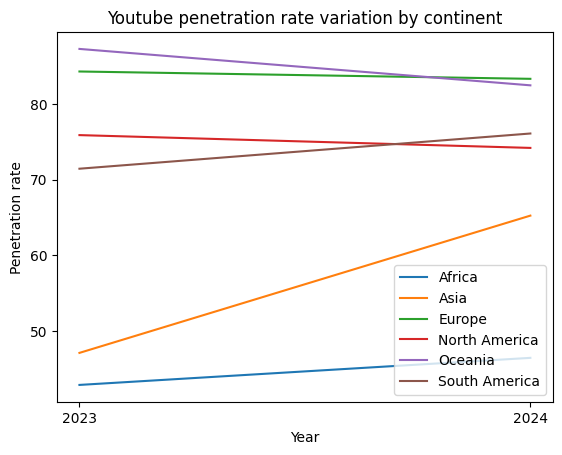

In [21]:
import matplotlib.pyplot as plt

for continent in aggregate_df.index:
    plt.plot([2023, 2024], aggregate_df.loc[continent,['yt_penetration_2023', 'yt_penetration_2024']])

plt.xlabel('Year')
plt.ylabel('Penetration rate')
plt.title('Youtube penetration rate variation by continent')
plt.xticks([2023, 2024], [2023, 2024])
plt.legend(aggregate_df.index)

# Insights finais

A avaliação da taxa de penetração de usuários na população de cada continente permitiu observar que
- Na Europa, o percentual de usuários se manteve bem estável de um ano para o outro;
- Na América do Norte e na Oceania, houve um leve declínio no uso da plataforma, mas é possível que haja imprecisão nos valores usados no cálculo;
- Houve subida da taxa na Ásia e na América do Sul; porém, naquela o aumento foi bastante significativo, de forma que poderia ser interessante buscar motivações geopolíticas que expliquem a variação;
- A África, onde se concentram países com baixos níveis de IDH, é o continente com o percentual mais baixo de usuários da avaliação, o que pode ser causado por um nível inferior de acesso à internet por parte da população. 